In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
sys.path.insert(1, '../src/')
from config import raw_data_path, univariate_data_path, processed_data_path, models_path

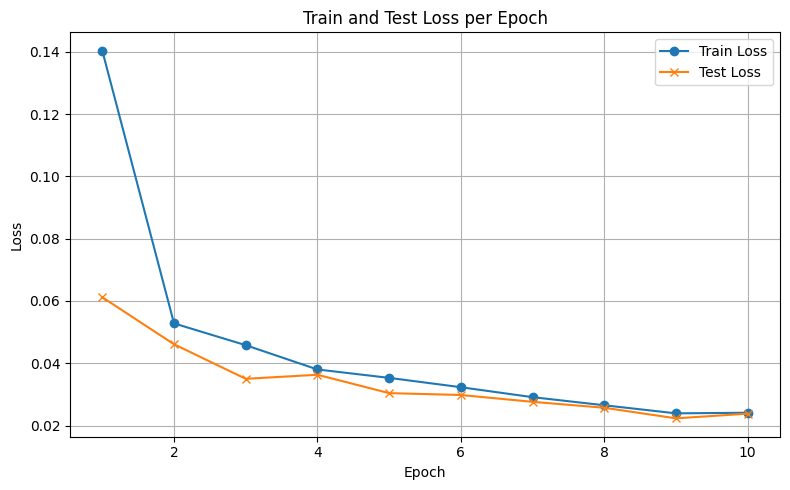

In [4]:
train_losses = [0.1404, 0.0528, 0.0458, 0.0380, 0.0353, 0.0323, 0.0291, 0.0265, 0.0239, 0.0241]
test_losses  = [0.0612, 0.0461, 0.0350, 0.0363, 0.0304, 0.0298, 0.0276, 0.0257, 0.0223, 0.0238]
num_epochs = 10
# Plotting after training
plt.figure(figsize=(8, 5))
plt.plot(range(1, num_epochs + 1), train_losses, label="Train Loss", marker='o')
plt.plot(range(1, num_epochs + 1), test_losses, label="Test Loss", marker='x')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Train and Test Loss per Epoch")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

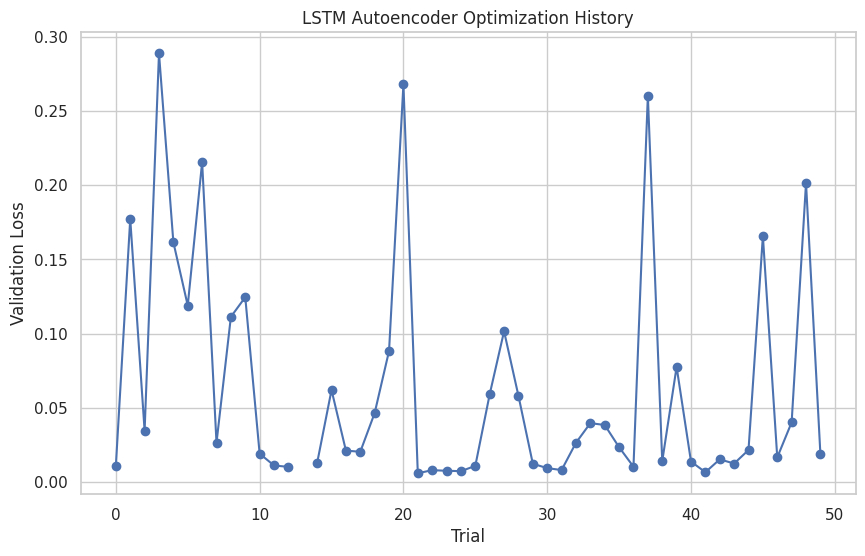

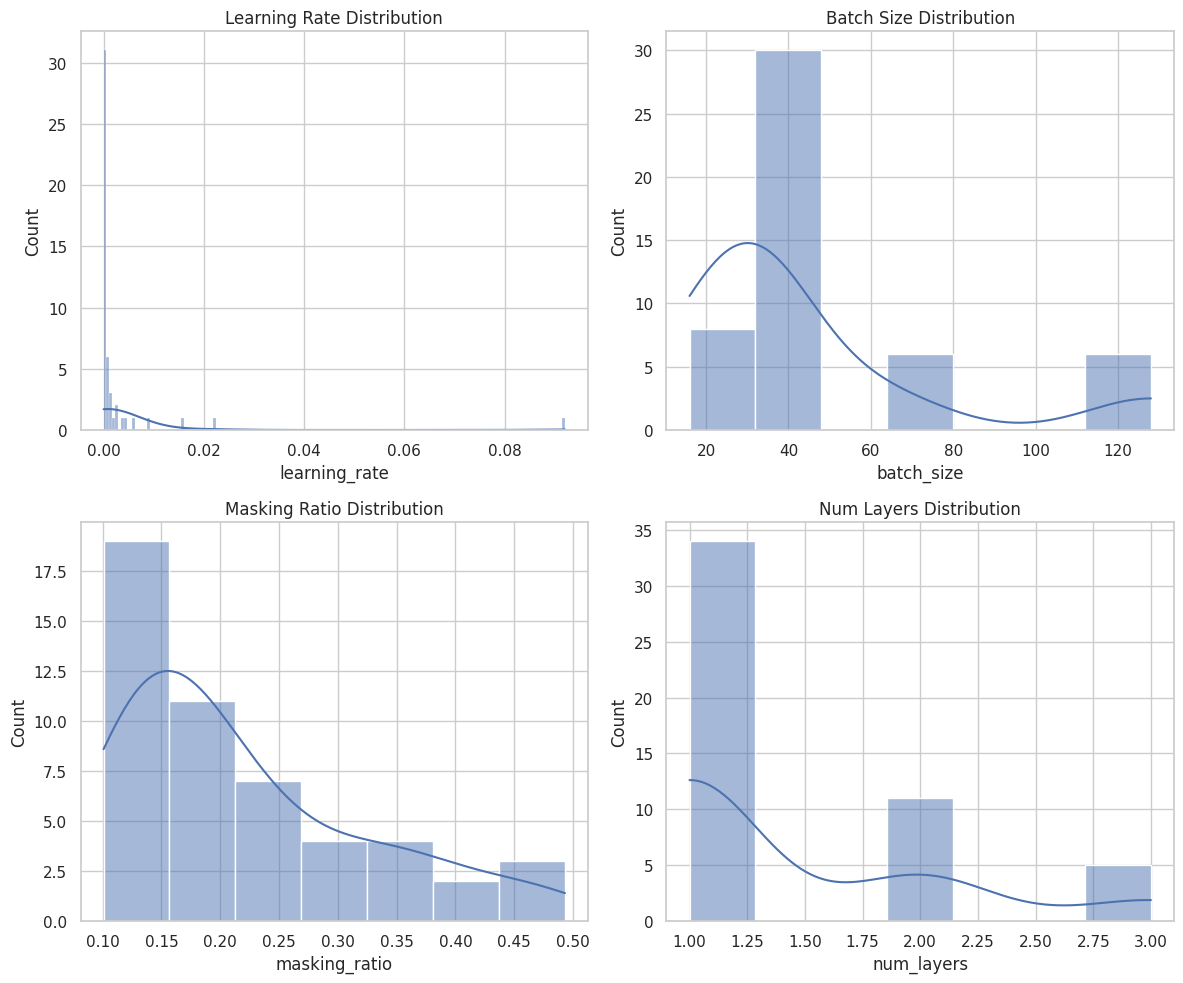

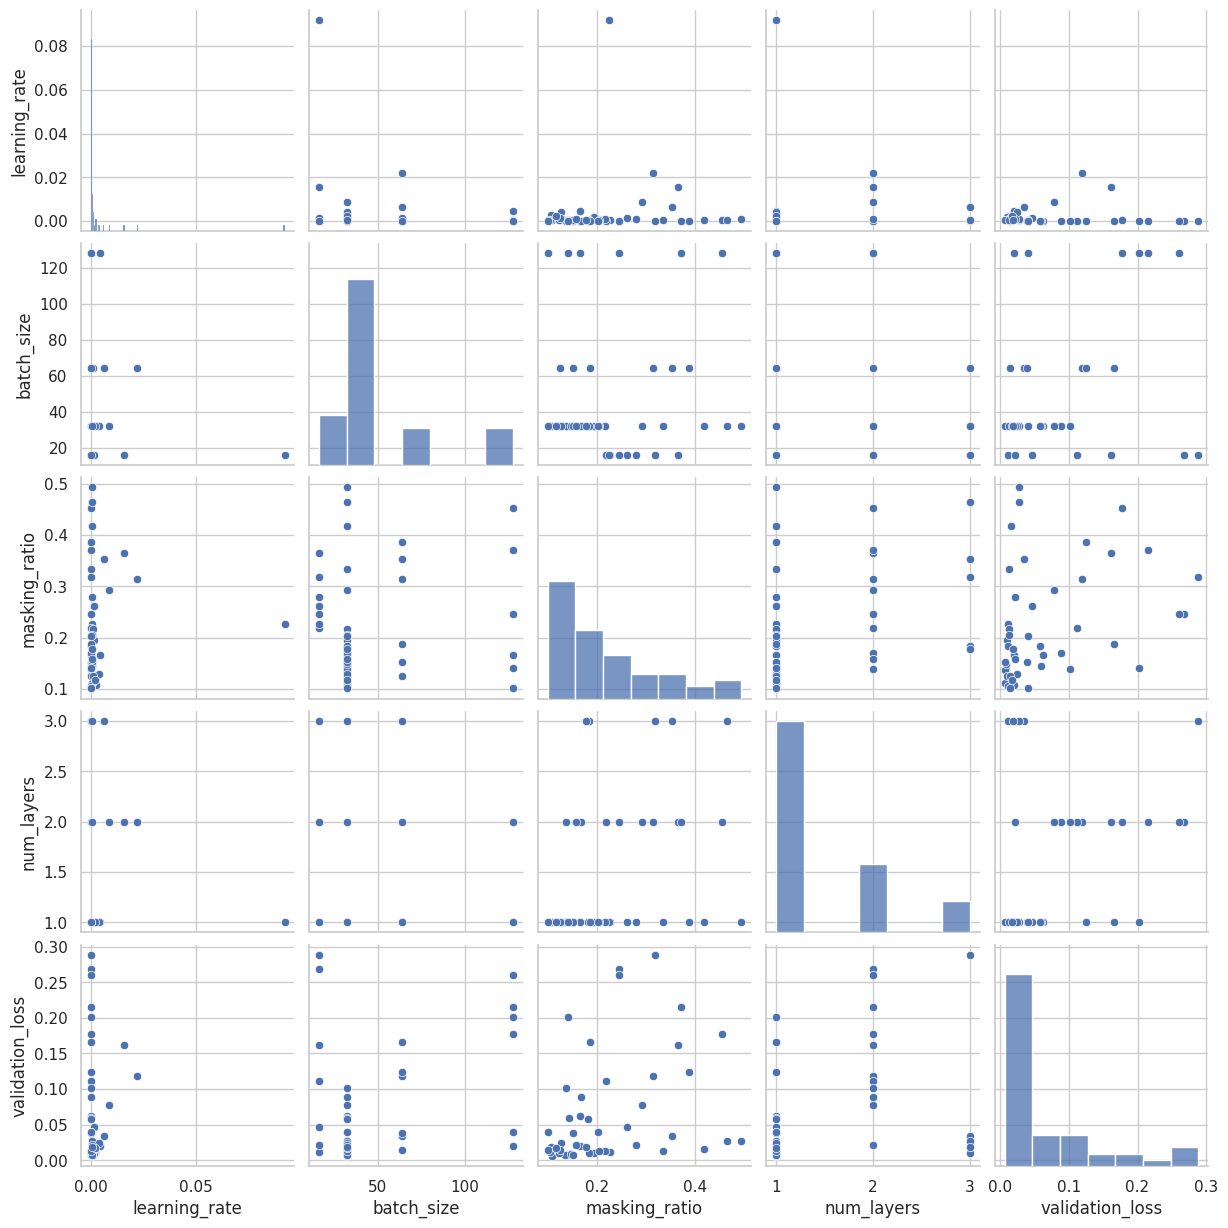

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Function to parse the data from the file
def parse_optuna_results(file_path):
    data = []
    with open(file_path, "r") as file:
        for line in file:
            # Use regex to extract the trial information
            match = re.match(
                r"Trial (\d+): learning_rate=(\S+), batch_size=(\d+), masking_ratio=(\S+), num_layers=(\d+), hidden_dim=(\d+), validation_loss=(\S+)", line)
            if match:
                trial, learning_rate, batch_size, masking_ratio, num_layers, hidden_dim, validation_loss = match.groups()
                # Append parsed data as a dictionary
                data.append({
                    "trial": int(trial),
                    "learning_rate": float(learning_rate),
                    "batch_size": int(batch_size),
                    "masking_ratio": float(masking_ratio),
                    "num_layers": int(num_layers),
                    "hidden_dim": int(hidden_dim),
                    "validation_loss": float(validation_loss)
                })
    return data

# Path to your optuna results file
file_path = "optuna_results.txt"

# Parse the results from the file
data = parse_optuna_results(file_path)

# Create DataFrame
df = pd.DataFrame(data)

# Plot Optimization History (Validation Loss vs. Trial Number)
plt.figure(figsize=(10, 6))
plt.plot(df["trial"], df["validation_loss"], marker='o', linestyle='-', color='b')
plt.xlabel("Trial")
plt.ylabel("Validation Loss")
plt.title("LSTM Autoencoder Optimization History")
plt.grid(True)
plt.show()

# Plot the distribution of hyperparameters
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot Learning Rate distribution
sns.histplot(df["learning_rate"], kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Learning Rate Distribution")

# Plot Batch Size distribution
sns.histplot(df["batch_size"], kde=True, ax=axes[0, 1])
axes[0, 1].set_title("Batch Size Distribution")

# Plot Masking Ratio distribution
sns.histplot(df["masking_ratio"], kde=True, ax=axes[1, 0])
axes[1, 0].set_title("Masking Ratio Distribution")

# Plot Num Layers distribution
sns.histplot(df["num_layers"], kde=True, ax=axes[1, 1])
axes[1, 1].set_title("Num Layers Distribution")

plt.tight_layout()
plt.show()

# You can also use seaborn to visualize hyperparameter importance with pairplot
sns.pairplot(df[["learning_rate", "batch_size", "masking_ratio", "num_layers", "validation_loss"]])
plt.show()


{'record_name': np.str_('Hopper-2024_11_03_17_27_01-0000010179-0003'), 'signal': array([[-3.49993458e+01,  9.31023086e-03, -3.49361898e+01,
        -1.59377413e+00,  2.70181033e+01, -3.11742561e+01],
       [-3.47088811e+01,  9.34143925e-03, -3.46490558e+01,
        -1.58334979e+00,  2.67939694e+01, -3.09181427e+01],
       [-3.44189962e+01,  9.37260750e-03, -3.43624800e+01,
        -1.57293140e+00,  2.65702830e+01, -3.06625273e+01],
       ...,
       [-1.91481802e-01,  1.49853793e-01, -1.81488681e-01,
         9.14775480e-04,  2.76752786e-01, -3.03924639e-01],
       [-1.91481809e-01,  1.49853761e-01, -1.81488719e-01,
         9.14744583e-04,  2.76752764e-01, -3.03924642e-01],
       [-1.91481815e-01,  1.49853736e-01, -1.81488749e-01,
         9.14720407e-04,  2.76752747e-01, -3.03924645e-01]],
      shape=(890880, 6)), 'preterm': 0}


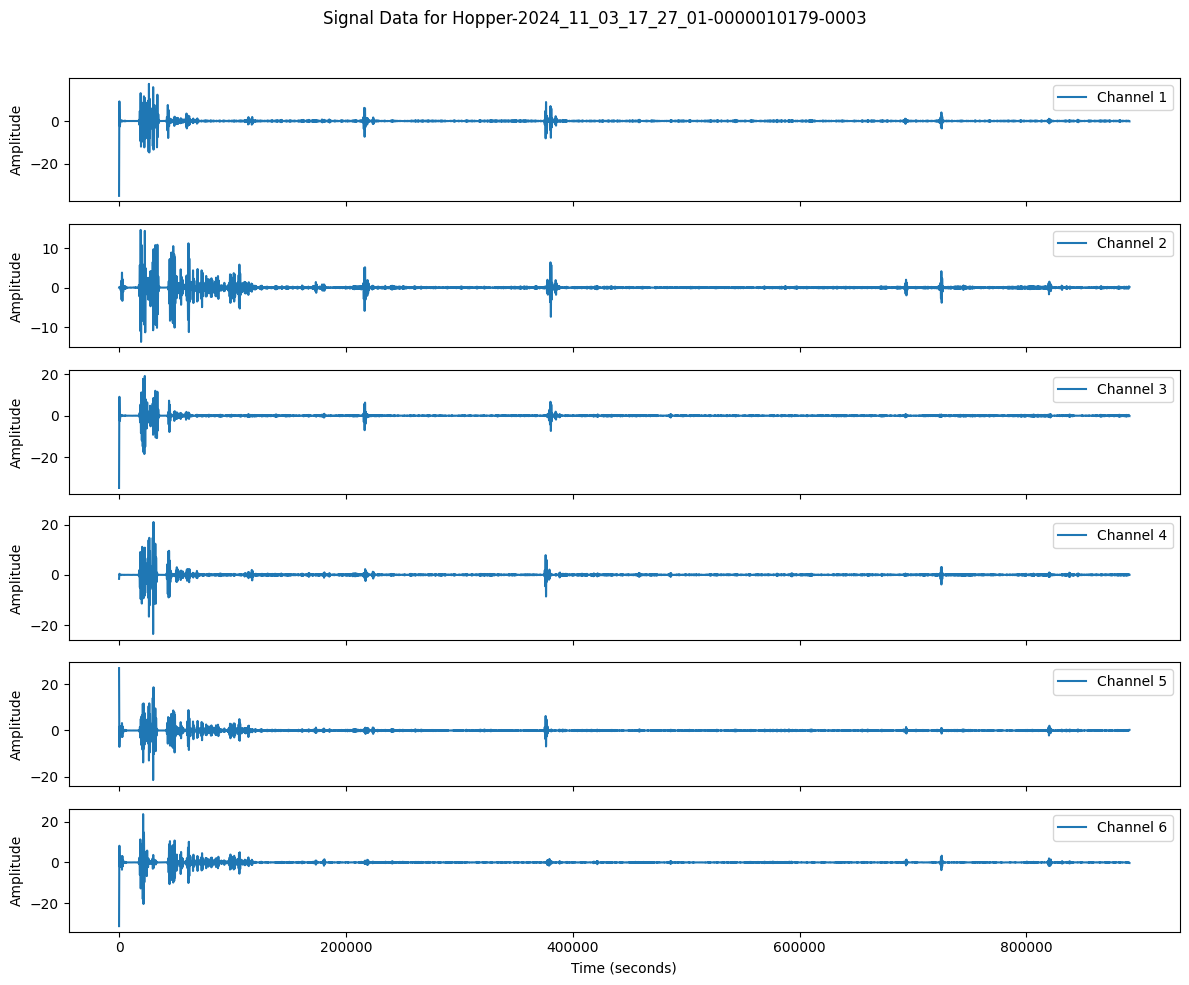

: 

In [12]:
# # Load the preprocessed dataset
# save_path = os.path.join(processed_data_path, 'target_preprocessed.npy')
# target_preprocessed = np.load(save_path, allow_pickle=True)

# # Extract the first instance
# first_instance = target_preprocessed[16]
# print(first_instance)
# signal = first_instance['signal']
# record_name = first_instance['record_name']
# # Create a figure with 6 subplots
# fig, axes = plt.subplots(6, 1, figsize=(12, 10), sharex=True)
# fig.suptitle(f"Signal Data for {record_name}")

# # Plot each channel in a separate subplot
# time_axis = np.arange(signal.shape[0])   # Time in seconds
# for i in range(6):
#     axes[i].plot(time_axis, signal[:, i], label=f'Channel {i+1}')
#     axes[i].set_ylabel("Amplitude")
#     axes[i].legend()

# axes[-1].set_xlabel("Time (seconds)")

# plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit title
# plt.show()

In [6]:
# # Load the preprocessed dataset
# save_path = os.path.join(raw_data_path, 'target_data.npy')
# target_preprocessed = np.load(save_path, allow_pickle=True)

# # Extract the first instance
# first_instance = target_preprocessed[11]
# print(first_instance)
# signal = first_instance['signal']
# record_name = first_instance['record_name']

# # Create a figure with 6 subplots
# fig, axes = plt.subplots(6, 1, figsize=(12, 10), sharex=True)
# fig.suptitle(f"Signal Data for {record_name}")

# # Plot each channel in a separate subplot
# time_axis = np.arange(signal.shape[0])   # Time in seconds
# for i in range(6):
#     axes[i].plot(time_axis, signal[:, i], label=f'Channel {i+1}')
#     axes[i].set_ylabel("Amplitude")
#     axes[i].legend()

# axes[-1].set_xlabel("Time (seconds)")

# plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit title
# plt.show()

('Hopper-2022_11_08_14_12_32-0000010090-0006', array([[-1.1444092e-01,  0.0000000e+00,  0.0000000e+00,  1.1444092e-01,
         1.1444092e-01,  0.0000000e+00],
       [ 9.8419189e+00, -1.0070801e+01, -1.0070801e+01, -1.9912720e+01,
        -1.9912720e+01,  0.0000000e+00],
       [ 1.3160706e+01, -1.3389587e+01, -1.3389587e+01, -2.6550293e+01,
        -2.6550293e+01,  0.0000000e+00],
       ...,
       [ 2.5978088e+01,  4.8500061e+02, -1.9006348e+03, -1.9266128e+03,
         4.5902252e+02, -2.3856353e+03],
       [ 9.7766876e+02,  5.1933289e+02, -1.9006348e+03, -2.8783035e+03,
        -4.5833588e+02, -2.4199678e+03],
       [-3.3142090e+02, -1.5776825e+03, -1.9006348e+03, -1.5692139e+03,
        -1.2462616e+03, -3.2295227e+02]],
      shape=(8797056, 6), dtype=float32), 1, 128)


/scratch-local/nwertheim.10488042/ipykernel_787664/1557139598.py:24: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit title
/home/nwertheim/.local/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


KeyboardInterrupt: 

{'record_name': np.str_('Hopper-2023_05_25_12_03_38-0000010090-0003'), 'signal': array([[-264.93073 , -215.60669 , -341.37726 ,  -76.44653 ,   49.324036,
        -125.77057 ],
       [-275.2304  , -177.49786 , -319.86237 ,  -44.631958,   97.732544,
        -142.3645  ],
       [-252.79999 , -160.10284 , -290.9088  ,  -38.108826,   92.69714 ,
        -130.80597 ],
       ...,
       [-207.48138 , -169.94476 , -124.85504 ,   82.62634 ,   37.53662 ,
          45.08972 ],
       [-204.50592 , -169.02924 , -129.31824 ,   75.18768 ,   35.476685,
          39.711   ],
       [-210.22797 , -162.5061  , -134.69696 ,   75.531006,   47.721863,
          27.809143]], shape=(421248, 6), dtype=float32), 'fs': np.int64(128), 'preterm': 0}


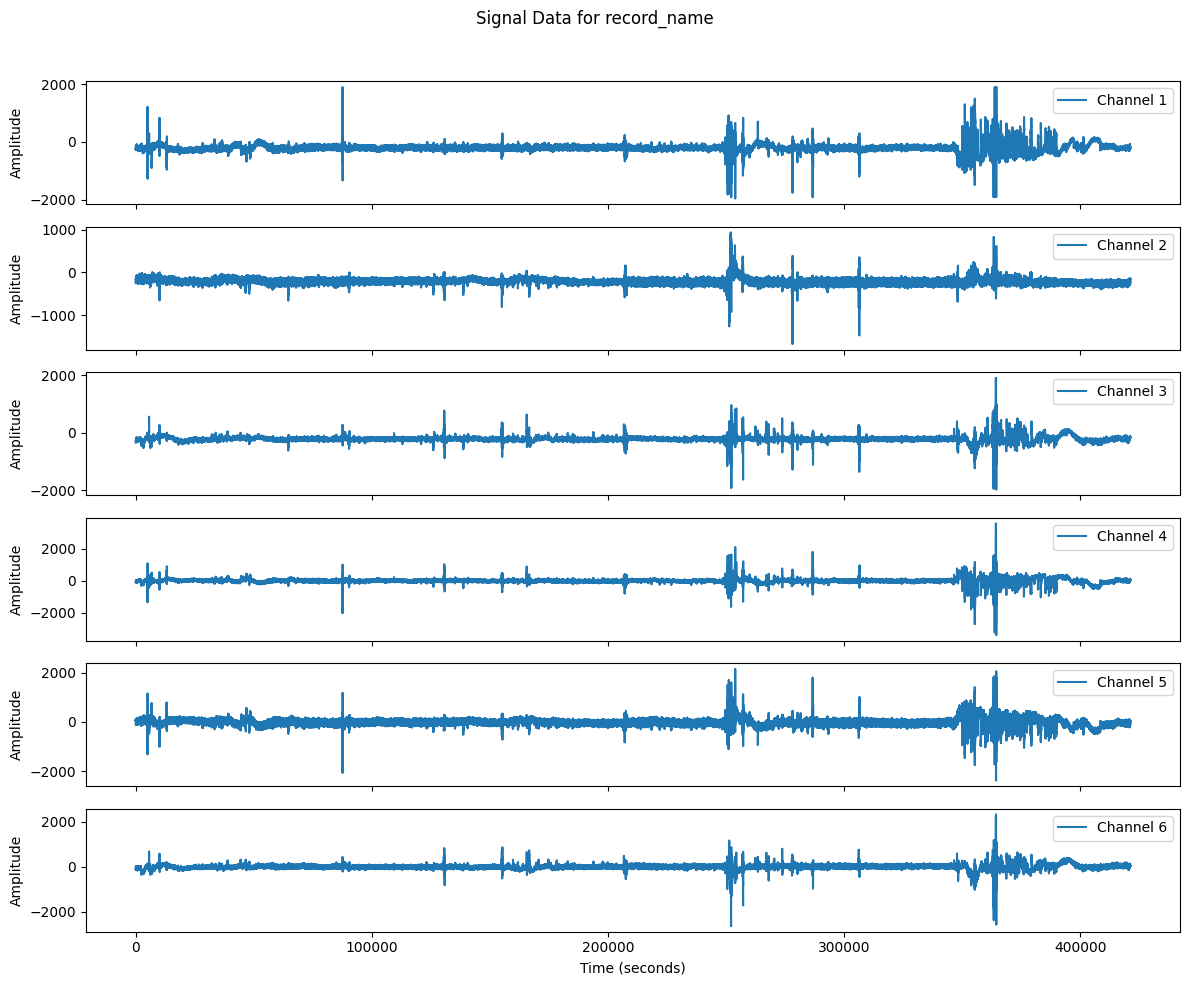

In [15]:
# # Load the preprocessed dataset
# save_path = os.path.join(processed_data_path, 'trimmed_target.npy')
# target_preprocessed = np.load(save_path, allow_pickle=True)

# # Extract the first instance
# first_instance = target_preprocessed[6]
# print(first_instance)
# signal = first_instance['signal']
# # Create a figure with 6 subplots
# fig, axes = plt.subplots(6, 1, figsize=(12, 10), sharex=True)
# fig.suptitle(f"Signal Data for {record_name}")

# # Plot each channel in a separate subplot
# time_axis = np.arange(signal.shape[0])   # Time in seconds
# for i in range(6):
#     axes[i].plot(time_axis, signal[:, i], label=f'Channel {i+1}')
#     axes[i].set_ylabel("Amplitude")
#     axes[i].legend()

# axes[-1].set_xlabel("Time (seconds)")

# plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit title
# plt.show()